In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("/Payment_Data.csv")

In [4]:
df1.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [6]:
df1.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [7]:
df1.groupby('label').size()

label
0    38661
1      560
dtype: int64

Label is highly imbalanced. The imbalance ratio of 1:0 is almost 1:69.
With such high imbalance and looking at the problem statement, where False Negative is more importance False Positive, we will be evaluating the models on the basis of their F2 score. And since the value of 1 is only 560, while preprocessing, we will not be dropping any row where lable is 1 and rather try to remove or impute any other feature where label is 1.

Handling Missing Values
1. Category
2. isWeekend

Lets Handle NaN values of Category

In [ ]:
df1["Category"].value_counts(dropna=False)

Category
shopping       13328
food           12964
electronics    12834
NaN               95
Name: count, dtype: int64

In [8]:
#checking the relation between Category and Label(target variable)
category_label_counts_1 = df1.groupby(['Category', 'label'], dropna=False).size().unstack(fill_value=0)
category_label_counts_1

label,0,1
Category,,
electronics,12658,176
food,12787,177
shopping,13129,199
NaN,87,8


In [9]:
#we will create a new dataframe df2 by dropping the rows where Category is NaN with label=0

df2 = df1.loc[~((df1['Category'].isnull()) & (df1['label'] == 0))]
df2.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [10]:
#checking whether it is dropped on not
category_label_counts_2 = df2.groupby(['Category', 'label'], dropna=False).size().unstack(fill_value=0)
category_label_counts_2

label,0,1
Category,,
electronics,12658,176
food,12787,177
shopping,13129,199
NaN,0,8


In [11]:
#imputing the remaining NaN value of Category feature
index_categoryisnull_labelis1 = df2.loc[((df2['Category'].isnull()) & (df2['label'] == 1))].index
for i in range(len(index_categoryisnull_labelis1)):
    if i < 2:
        df2.loc[index_categoryisnull_labelis1[i], "Category"] = "electronics"
    elif i < 4:
        df2.loc[index_categoryisnull_labelis1[i], "Category"] = "food"
    else:
        df2.loc[index_categoryisnull_labelis1[i], "Category"] = "shopping"

In [12]:
#checking whether it is imputed or not
category_label_counts_3 = df2.groupby(['Category', 'label'], dropna=False).size().unstack(fill_value=0)
category_label_counts_3

label,0,1
Category,,
electronics,12658,178
food,12787,179
shopping,13129,203


Now let's handle NaN value of isWeekend feature

In [13]:
isWeekend_label_counts_1 = df2.groupby(['isWeekend', 'label'], dropna=False).size().unstack(fill_value=0)
isWeekend_label_counts_1

label,0,1
isWeekend,,
0.0,19308,0
1.0,19266,0
NaN,0,560


From the above output, it can be safely assumed with the available dataset, that the outcome of 1 is completely independent of the isWeekend feature. Hence, we will drop this feature from our dataset.

In [14]:
df2.drop('isWeekend', inplace=True, axis=1)

<ipython-input-14-e88d9bcba9f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('isWeekend', inplace=True, axis=1)


In [ ]:
df2.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,label
0,29,1,4.745402,paypal,28.204861,shopping,0
1,725,1,4.742303,storecredit,0.000000,electronics,0
2,845,1,4.921318,creditcard,0.000000,food,0
3,503,1,4.886641,creditcard,0.000000,electronics,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0


In [15]:
df2.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
label                   0
dtype: int64

Hence, all the NaN values have been handled.

Now, let's handle the Categorical features

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39134 entries, 0 to 39220
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39134 non-null  int64  
 1   numItems              39134 non-null  int64  
 2   localTime             39134 non-null  float64
 3   paymentMethod         39134 non-null  object 
 4   paymentMethodAgeDays  39134 non-null  float64
 5   Category              39134 non-null  object 
 6   label                 39134 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.4+ MB


In [ ]:
#paymnetMethod & Category are two categorical feature.
df2['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [ ]:
df2['Category'].unique()

array(['shopping', 'electronics', 'food'], dtype=object)

In [ ]:
df2['Category'].value_counts()

Category
shopping       13332
food           12966
electronics    12836
Name: count, dtype: int64

Here, electronics has minimum values of data compared to other two categories.

In [ ]:
df2['paymentMethod'].value_counts()

paymentMethod
creditcard     27944
paypal          9276
storecredit     1914
Name: count, dtype: int64

Here, storecredit has least value of data compared to ohter two categories

In [16]:
#as the three categories in the Category features are almost in equal proportion, target encoding is the best approach
#further, since the data is highly imbalanced, we will go with the Weight of Evidence encode method for target encoding
category_label_counts_4 = df2.groupby(['Category'])['label'].value_counts().unstack(fill_value=0)
category_label_counts_4

label,0,1
Category,,
electronics,12658,178
food,12787,179
shopping,13129,203


In [27]:
c_total_1 = category_label_counts_4[1].sum()
c_total_0 = category_label_counts_4[0].sum()
c_total_1, c_total_0

(560, 38574)

In [28]:
category_label_counts_4['1_prop'] = category_label_counts_4[1] / c_total_1
category_label_counts_4['0_prop'] = category_label_counts_4[0] / c_total_0
category_label_counts_4

label,0,1,1_prop,0_prop
Category,,,,
electronics,12658,178,0.317857,0.328148
food,12787,179,0.319643,0.331493
shopping,13129,203,0.362500,0.340359


In [29]:
#calculating WOE values for the categories
category_label_WoE = np.log(category_label_counts_4['1_prop']/category_label_counts_4['0_prop'])
category_label_WoE

Category
electronics   -0.031864
food          -0.036402
shopping       0.063024
dtype: float64

WoE values indicate the strength of the relationship between each category of the "Category" feature and the likelihood of being a fraudalent transaction. Positive WoE values suggest that the transactoins are more likely to be fraud, while negative WoE values suggest the opposite. WoE encoding replaces the original categories with these WoE values, effectively transforming the categorical feature into a numerical representation that captures the relationship with the target variable.

Since we are getting approximately -4 in all the categories, it basically means that the probabiilty of outcome 1 is very compared to 0. This is happening because the data is highly imbalanced.

In [21]:
#creating a copy of the dataframe before proceeding further
df3 = df2.copy()

In [22]:
df3.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,label
0,29,1,4.745402,paypal,28.204861,shopping,0
1,725,1,4.742303,storecredit,0.000000,electronics,0
2,845,1,4.921318,creditcard,0.000000,food,0
3,503,1,4.886641,creditcard,0.000000,electronics,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0


In [23]:
df3['Category'] = df3['Category'].map(category_label_WoE)
df3.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,label
0,29,1,4.745402,paypal,28.204861,0.063024,0
1,725,1,4.742303,storecredit,0.000000,-0.031864,0
2,845,1,4.921318,creditcard,0.000000,-0.036402,0
3,503,1,4.886641,creditcard,0.000000,-0.031864,0
4,2000,1,5.040929,creditcard,0.000000,0.063024,0


In [24]:
df3['paymentMethod'].value_counts()

paymentMethod
creditcard     27944
paypal          9276
storecredit     1914
Name: count, dtype: int64

In [26]:
paymentmethod_label_counts_1 = df3.groupby(['paymentMethod'])['label'].value_counts().unstack(fill_value=0)
paymentmethod_label_counts_1

label,0,1
paymentMethod,,
creditcard,27534,410
paypal,9147,129
storecredit,1893,21


In [30]:
pm_total_1 = paymentmethod_label_counts_1[1].sum()
pm_total_0 = paymentmethod_label_counts_1[0].sum()
paymentmethod_label_counts_1['1_prop'] = paymentmethod_label_counts_1[1] / pm_total_1
paymentmethod_label_counts_1['0_prop'] = paymentmethod_label_counts_1[0] / pm_total_0
paymentmethod_label_counts_1

label,0,1,1_prop,0_prop
paymentMethod,,,,
creditcard,27534,410,0.732143,0.713797
paypal,9147,129,0.230357,0.237129
storecredit,1893,21,0.037500,0.049075


In [31]:
paymentmethod_label_woe = np.log(paymentmethod_label_counts_1['1_prop']/paymentmethod_label_counts_1['0_prop'])
paymentmethod_label_woe

paymentMethod
creditcard     0.025377
paypal        -0.028972
storecredit   -0.268999
dtype: float64

In [36]:
type(paymentmethod_label_woe)

pandas.core.series.Series

In [32]:
#WoE encoding the paymentmethod
df3['paymentMethod'] = df3['paymentMethod'].map(paymentmethod_label_woe)
df3.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,label
0,29,1,4.745402,-0.028972,28.204861,0.063024,0
1,725,1,4.742303,-0.268999,0.000000,-0.031864,0
2,845,1,4.921318,0.025377,0.000000,-0.036402,0
3,503,1,4.886641,0.025377,0.000000,-0.031864,0
4,2000,1,5.040929,0.025377,0.000000,0.063024,0


In [37]:
df3.paymentMethod.value_counts()

paymentMethod
 0.025377    27944
-0.028972     9276
-0.268999     1914
Name: count, dtype: int64

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39134 entries, 0 to 39220
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39134 non-null  int64  
 1   numItems              39134 non-null  int64  
 2   localTime             39134 non-null  float64
 3   paymentMethod         39134 non-null  float64
 4   paymentMethodAgeDays  39134 non-null  float64
 5   Category              39134 non-null  float64
 6   label                 39134 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 3.4 MB


Thus, till now all the Nan value and Categorical values has been handled.

In [ ]:
#checking other numerical features and doing its feature engineering

In [35]:
df3.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,label
0,29,1,4.745402,-0.028972,28.204861,0.063024,0
1,725,1,4.742303,-0.268999,0.000000,-0.031864,0
2,845,1,4.921318,0.025377,0.000000,-0.036402,0
3,503,1,4.886641,0.025377,0.000000,-0.031864,0
4,2000,1,5.040929,0.025377,0.000000,0.063024,0


In [ ]:
df3.groupby(['numItems', 'label']).size().unstack(fill_value=0)

label,0,1
numItems,,
1,36865,454
2,1259,82
3,147,16
4,39,3
5,164,4
6,15,0
7,5,0
8,5,0
9,1,0


In [39]:
#removing all the rows where the value of numItems is equivalent to the arr
arr = np.array([6, 7, 8, 9, 11, 12, 15, 29]) #chosen values are equivalent to those numItems value, where the outcome of lable is not 1
df4 = df3[~df3['numItems'].isin(arr)]
df4.groupby(['numItems', 'label']).size().unstack(fill_value=0)

label,0,1
numItems,,
1,36865,454
2,1259,82
3,147,16
4,39,3
5,164,4
10,70,1


In [ ]:
df4.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,label
0,29,1,4.745402,-4.261369,28.204861,-4.169373,0
1,725,1,4.742303,-4.501396,0.000000,-4.264261,0
2,845,1,4.921318,-4.207020,0.000000,-4.268799,0
3,503,1,4.886641,-4.207020,0.000000,-4.264261,0
4,2000,1,5.040929,-4.207020,0.000000,-4.169373,0


In [40]:
df4['localTime_hour'], df4['localTime_minute'] = divmod(df4['localTime']*60, 60)
df4['localTime_minute'] = round(df4['localTime_minute'])
df4.drop('localTime', inplace=True, axis=1)
df4.head()

<ipython-input-40-25e83a58d04e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['localTime_hour'], df4['localTime_minute'] = divmod(df4['localTime']*60, 60)
<ipython-input-40-25e83a58d04e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['localTime_hour'], df4['localTime_minute'] = divmod(df4['localTime']*60, 60)
<ipython-input-40-25e83a58d04e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,accountAgeDays,numItems,paymentMethod,paymentMethodAgeDays,Category,label,localTime_hour,localTime_minute
0,29,1,-0.028972,28.204861,0.063024,0,4.0,45.0
1,725,1,-0.268999,0.000000,-0.031864,0,4.0,45.0
2,845,1,0.025377,0.000000,-0.036402,0,4.0,55.0
3,503,1,0.025377,0.000000,-0.031864,0,4.0,53.0
4,2000,1,0.025377,0.000000,0.063024,0,5.0,2.0


In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39104 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39104 non-null  int64  
 1   numItems              39104 non-null  int64  
 2   paymentMethod         39104 non-null  float64
 3   paymentMethodAgeDays  39104 non-null  float64
 4   Category              39104 non-null  float64
 5   label                 39104 non-null  int64  
 6   localTime_hour        39104 non-null  float64
 7   localTime_minute      39104 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 2.7 MB


In [ ]:
#checking relation between the label and the oulier features localTime_hour, pamentMethodAgeDays, paymentMethod
df4.groupby(['localTime_hour', 'label']).size().unstack(fill_value=0)

label,0,1
localTime_hour,,
0.0,2,0
2.0,405,33
3.0,1666,47
4.0,29913,423
5.0,6558,57


In [42]:
df4.groupby(['paymentMethodAgeDays', 'label']).size().unstack(fill_value=0)

label,0,1
paymentMethodAgeDays,,
0.000000,13578,295
0.000694,2253,77
0.001389,821,53
0.002083,471,26
0.002778,360,15
...,...,...
1988.692361,1,0
1988.699306,1,0
1991.989583,1,0


In [43]:
# Get the row indices where label 1 is 0
indices_to_remove = df4.groupby(['paymentMethodAgeDays', 'label']).size().unstack(fill_value=0)[1] == 0

# Filter out the rows from df4 where label 1 is 0
df5 = df4[~df4['paymentMethodAgeDays'].isin(indices_to_remove.index[indices_to_remove])]

df5.head()


,accountAgeDays,numItems,paymentMethod,paymentMethodAgeDays,Category,label,localTime_hour,localTime_minute
1,725,1,-0.268999,0.0,-0.031864,0,4.0,45.0
2,845,1,0.025377,0.0,-0.036402,0,4.0,55.0
3,503,1,0.025377,0.0,-0.031864,0,4.0,53.0
4,2000,1,0.025377,0.0,0.063024,0,5.0,2.0
5,119,1,-0.028972,0.0,0.063024,0,4.0,58.0


In [48]:
df5.groupby('label').size()

label
0    19300
1      560
dtype: int64

In [49]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19860 entries, 1 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        19860 non-null  int64  
 1   numItems              19860 non-null  int64  
 2   paymentMethod         19860 non-null  float64
 3   paymentMethodAgeDays  19860 non-null  float64
 4   Category              19860 non-null  float64
 5   label                 19860 non-null  int64  
 6   localTime_hour        19860 non-null  float64
 7   localTime_minute      19860 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


In [50]:
df5.groupby(['paymentMethod','label']).size().unstack(fill_value=0)

label,0,1
paymentMethod,,
-0.268999,910,21
-0.028972,4583,129
0.025377,13807,410


Till now all the feature selection and feature engineering is done.
Not its time for feature scaling and checking the data distribution

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df5_scaled = pd.DataFrame(scaler.fit_transform(df5), columns=df5.columns)
df5_scaled.head()

,accountAgeDays,numItems,paymentMethod,paymentMethodAgeDays,Category,label,localTime_hour,localTime_minute
0,0.362181,0.0,0.000000,0.0,0.045636,0.0,0.8,0.771930
1,0.422211,0.0,1.000000,0.0,0.000000,0.0,0.8,0.947368
2,0.251126,0.0,1.000000,0.0,0.045636,0.0,0.8,0.912281
3,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.0,0.017544
4,0.059030,0.0,0.815375,0.0,1.000000,0.0,0.8,1.000000


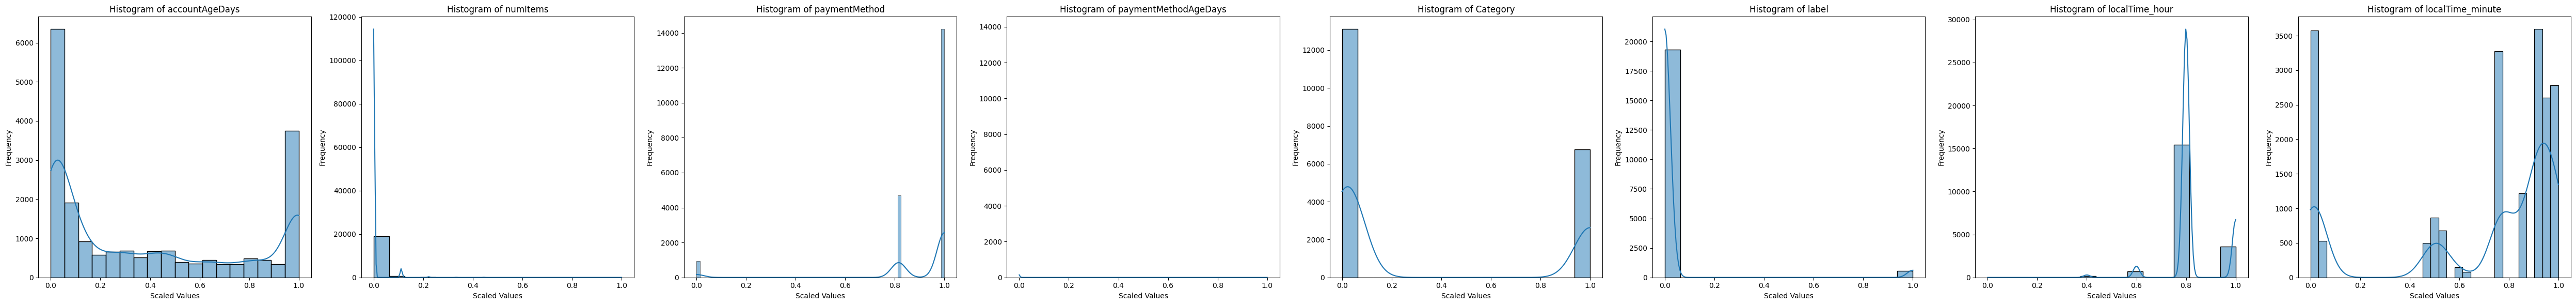

In [54]:
#Plotting the histogram of all the features to understand the distrbution of all the features

plt.figure(figsize=(50, 6))

for i, column in enumerate(df5_scaled.columns, 1):
    plt.subplot(1, len(df5_scaled.columns), i)
    sns.histplot(df5_scaled[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Scaled Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

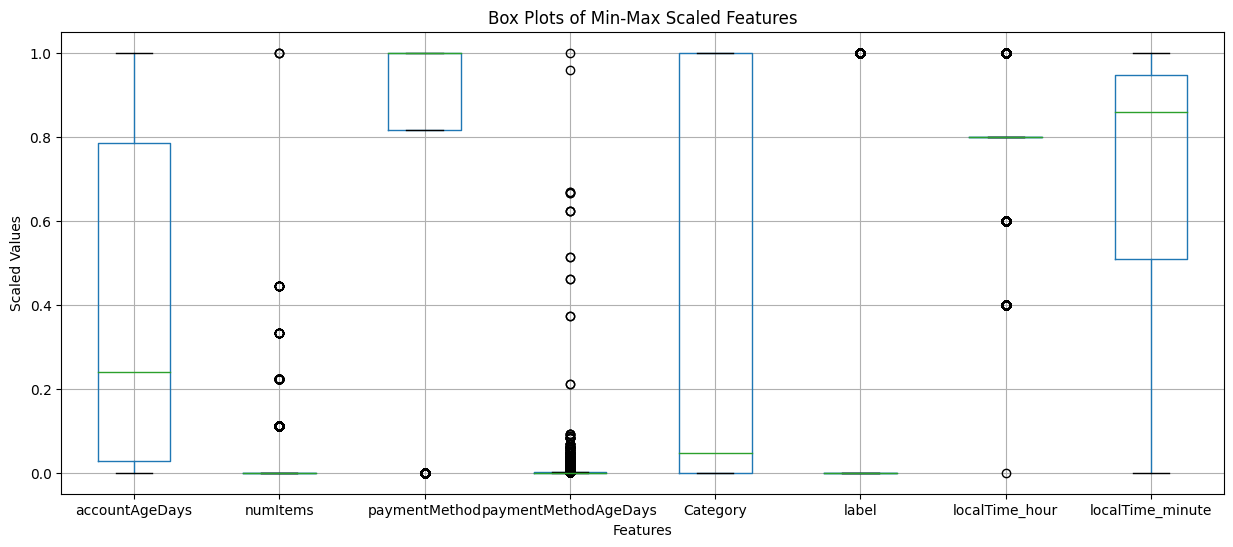

In [56]:
#Checking outliers by plotting boxplot for all the features
plt.figure(figsize=(15, 6))
df5_scaled.boxplot()
plt.title('Box Plots of Min-Max Scaled Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.show()

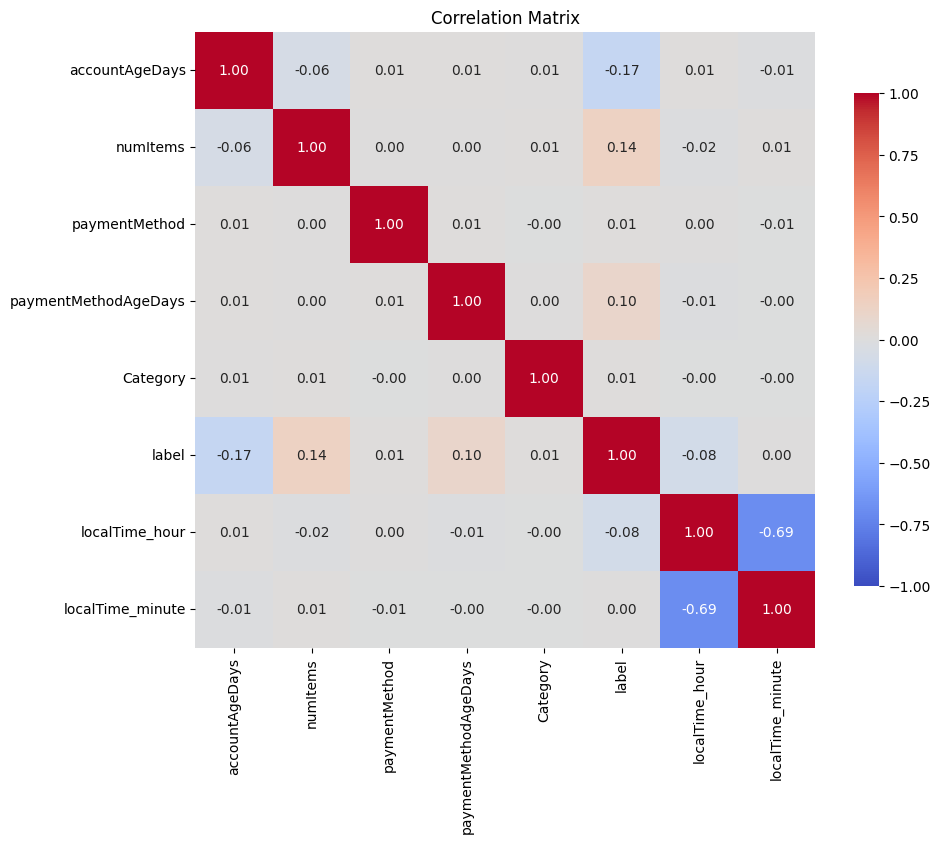

In [57]:
#checking correlation
corr_matrix = df5_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"shrink":.8})
plt.title('Correlation Matrix')
plt.show()

In [62]:
df5_scaled.drop('localTime_minute', inplace=True, axis=1)

In [63]:
df5_scaled.head()

,accountAgeDays,numItems,paymentMethod,paymentMethodAgeDays,Category,label,localTime_hour
0,0.362181,0.0,0.000000,0.0,0.045636,0.0,0.8
1,0.422211,0.0,1.000000,0.0,0.000000,0.0,0.8
2,0.251126,0.0,1.000000,0.0,0.045636,0.0,0.8
3,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.0
4,0.059030,0.0,0.815375,0.0,1.000000,0.0,0.8


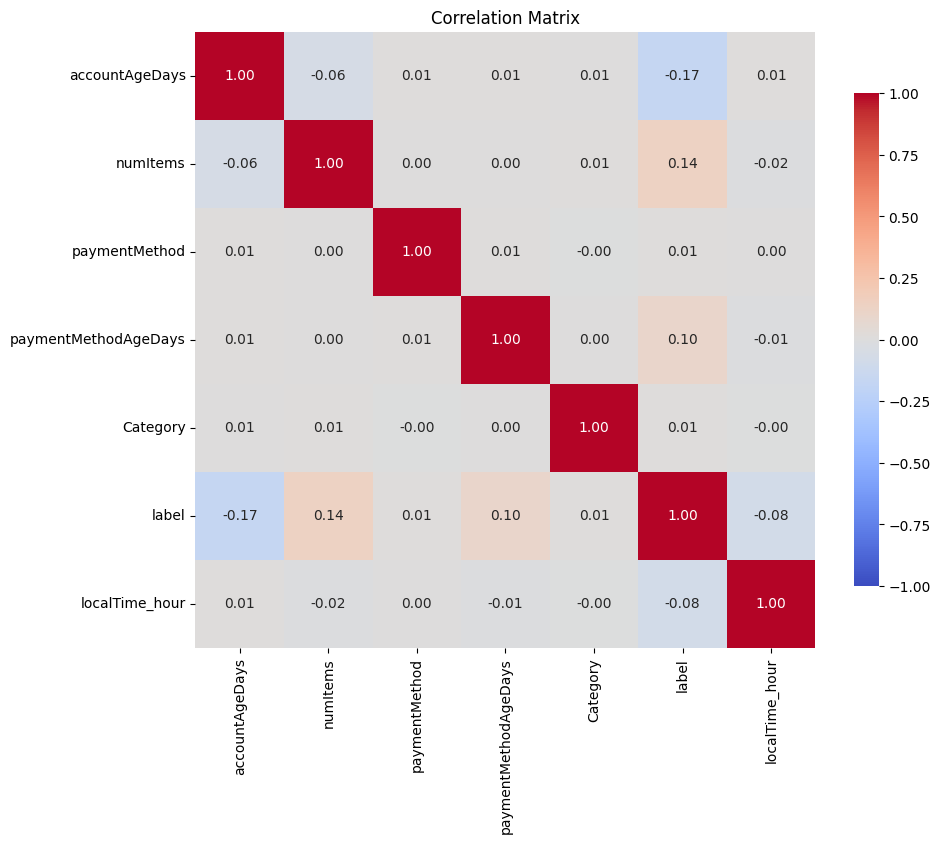

In [64]:
corr_matrix_2 = df5_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"shrink":.8})
plt.title('Correlation Matrix')
plt.show()

In [66]:
df5_scaled.head()

,accountAgeDays,numItems,paymentMethod,paymentMethodAgeDays,Category,label,localTime_hour
0,0.362181,0.0,0.000000,0.0,0.045636,0.0,0.8
1,0.422211,0.0,1.000000,0.0,0.000000,0.0,0.8
2,0.251126,0.0,1.000000,0.0,0.045636,0.0,0.8
3,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.0
4,0.059030,0.0,0.815375,0.0,1.000000,0.0,0.8


In [67]:
df5_scaled.to_csv('df5_scaled.csv', index=False)

In [68]:
X = df5_scaled.drop('label', axis=1)
y = df5_scaled['label']

Lets begin with the model training

In [79]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, fbeta_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [71]:
# Split data into training and testing sets, since data is imbalanced, setting stratify=y will split the data in equal proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
# Since we are focusing more or reducing the False Negative, will set a custom scorer of beta 2 for the F score
#for binary classification problems, especially when dealing with imbalanced datasets and focusing on the minority class,
#we are using average='binary'. This approach calculates the F2 score considering only the positive class (class 1).
#This is particularly useful for imbalanced datasets where the minority class is of greater interest.
f2_scorer = make_scorer(fbeta_score, beta=2, average='binary')

In [81]:
#Model & Its Parameter Grid
models = {
    'LogisticRegression': (LogisticRegression(class_weight='balanced'), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    }),
    'SVC': (SVC(class_weight='balanced', probability=True), {
        'model__C': [0.1, 1, 10],
        'model__gamma': [0.001, 0.0001],
        'model__kernel': ['linear', 'rbf']
    }),
    'RandomForestClassifier': (RandomForestClassifier(class_weight='balanced'), {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__criterion': ['gini', 'entropy']
    }),
    'XGBoost': (xgb.XGBClassifier(scale_pos_weight=35, use_label_encoder=False), {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__min_child_weight': [1, 3, 5],
        'model__gamma': [0, 0.1, 0.3],
        'model__subsample': [0.8, 0.9, 1.0],
        'model__colsample_bytree': [0.8, 0.9, 1.0]
    })
}

model_df = pd.DataFrame(models.items(), columns=['Model', 'Parameters'])
model_df

,Model,Parameters
0,LogisticRegression,"(LogisticRegression(class_weight='balanced'), ..."
1,SVC,"(SVC(class_weight='balanced', probability=True..."
2,RandomForestClassifier,(RandomForestClassifier(class_weight='balanced...
3,XGBoost,"(XGBClassifier(base_score=None, booster=None, ..."


In [78]:
# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [85]:
results = []

for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('over', SMOTE(n_jobs=-1, sampling_strategy=0.1)),
        ('under', NearMiss(n_jobs=-1, sampling_strategy=0.5)),
        ('model', model)
    ])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=skf, scoring=f2_scorer)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    f2_score_best = fbeta_score(y_test, y_pred, beta=2, average='binary')
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    roc_auc_score_best = roc_auc_score(y_test, y_pred_proba)



    results.append({
        'model': model_name,
        'best_params': best_params,
        'f2_score': f2_score_best,
        'roc_auc_score': roc_auc_score_best,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    })

    # Removing the model step from the pipeline for the next iteration
    pipeline.steps.pop()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_

In [86]:
results

[{'model': 'LogisticRegression',
  'best_params': {'model__C': 10, 'model__solver': 'liblinear'},
  'f2_score': 0.7185185185185184,
  'roc_auc_score': 0.9688240192450037,
  'confusion_matrix': array([[3730,  130],
         [  15,   97]]),
  'classification_report': '              precision    recall  f1-score   support\n\n         0.0       1.00      0.97      0.98      3860\n         1.0       0.43      0.87      0.57       112\n\n    accuracy                           0.96      3972\n   macro avg       0.71      0.92      0.78      3972\nweighted avg       0.98      0.96      0.97      3972\n'},
 {'model': 'SVC',
  'best_params': {'model__C': 10,
   'model__gamma': 0.001,
   'model__kernel': 'linear'},
  'f2_score': 0.6241956241956244,
  'roc_auc_score': 0.9739475388601035,
  'confusion_matrix': array([[3628,  232],
         [  15,   97]]),
  'classification_report': '              precision    recall  f1-score   support\n\n         0.0       1.00      0.94      0.97      3860\n     

In [87]:
# Storing results in a Dataframe
summary_results = pd.DataFrame([{
    'model': result['model'],
    'best_params': result['best_params'],
    'f2_score': result['f2_score'],
    'roc_auc_score': result['roc_auc_score']
} for result in results])

summary_results

,model,best_params,f2_score,roc_auc_score
0,LogisticRegression,"{'model__C': 10, 'model__solver': 'liblinear'}",0.718519,0.968824
1,SVC,"{'model__C': 10, 'model__gamma': 0.001, 'model...",0.624196,0.973948
2,RandomForestClassifier,"{'model__criterion': 'gini', 'model__max_depth...",1.000000,1.000000
3,XGBoost,"{'model__colsample_bytree': 0.8, 'model__gamma...",1.000000,1.000000


In [88]:
# Print detailed evaluation for each model
for result in results:
    print(f"Model: {result['model']}")
    print(f"Best Params: {result['best_params']}")
    print(f"F2 Score: {result['f2_score']}")
    print(f"ROC AUC Score: {result['roc_auc_score']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n" + "="*80 + "\n")

Model: LogisticRegression
Best Params: {'model__C': 10, 'model__solver': 'liblinear'}
F2 Score: 0.7185185185185184
ROC AUC Score: 0.9688240192450037
Confusion Matrix:
[[3730  130]
 [  15   97]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      3860
         1.0       0.43      0.87      0.57       112

    accuracy                           0.96      3972
   macro avg       0.71      0.92      0.78      3972
weighted avg       0.98      0.96      0.97      3972



Model: SVC
Best Params: {'model__C': 10, 'model__gamma': 0.001, 'model__kernel': 'linear'}
F2 Score: 0.6241956241956244
ROC AUC Score: 0.9739475388601035
Confusion Matrix:
[[3628  232]
 [  15   97]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      3860
         1.0       0.29      0.87      0.44       112

    accuracy                           0.94      3972
   macro avg  

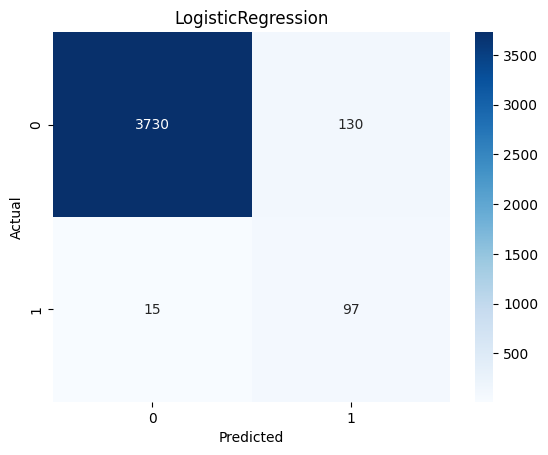

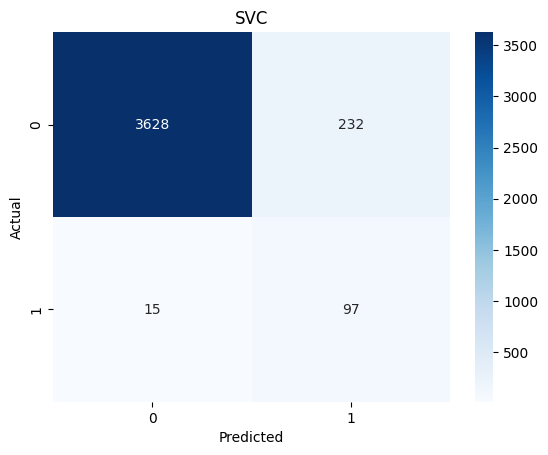

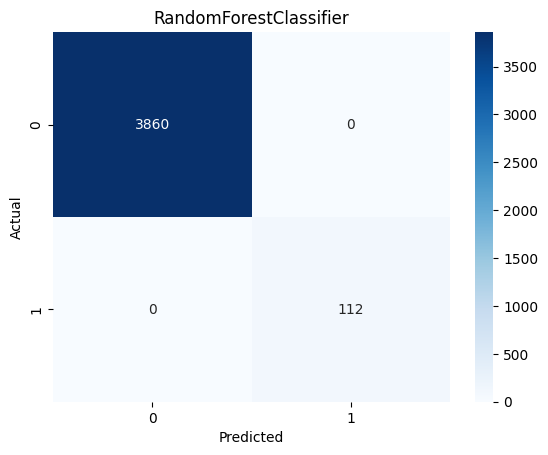

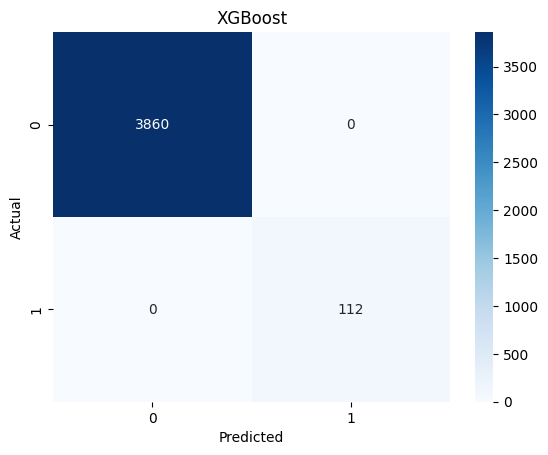

In [89]:
for result in results:
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(result['model'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

From the above dataframe, it is clear that RandomForestClassifier and XGBoost are giving better score than the latter two. Even though, it is evident that the score of 1 is clearly because of overfitting of the data.

Hence, we will train our model on RandomForestClassifier and XGBoost

In [90]:
rfclf = RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
xgbclf = xgb.XGBClassifier(colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8)

In [91]:
rfclf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50)

In [92]:
xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
y_rf_pred = rfclf.predict(X_test)
y_xgb_pred = xgbclf.predict(X_test)

In [96]:
rf_cm = confusion_matrix(y_test, y_rf_pred)
xgb_cm = confusion_matrix(y_test, y_xgb_pred)

In [94]:
rf_crp = classification_report(y_test, y_rf_pred)
xgb_crp = classification_report(y_test, y_xgb_pred)

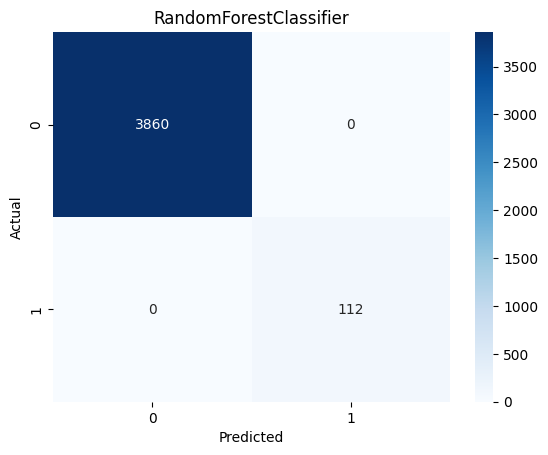

In [97]:
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

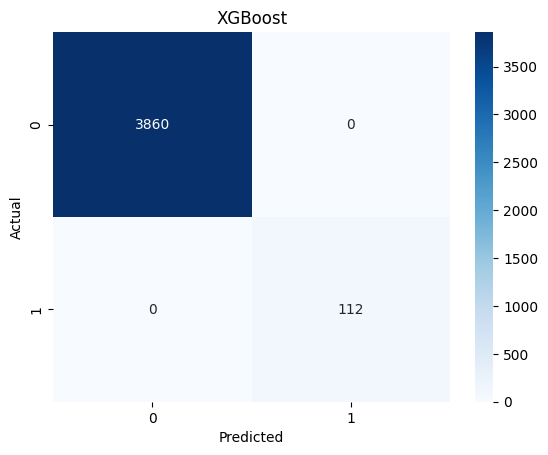

In [98]:
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [99]:
print(rf_crp)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3860
         1.0       1.00      1.00      1.00       112

    accuracy                           1.00      3972
   macro avg       1.00      1.00      1.00      3972
weighted avg       1.00      1.00      1.00      3972



In [100]:
print(xgb_crp)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3860
         1.0       1.00      1.00      1.00       112

    accuracy                           1.00      3972
   macro avg       1.00      1.00      1.00      3972
weighted avg       1.00      1.00      1.00      3972

